In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [41]:
#datasets

#data_splitting
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [42]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

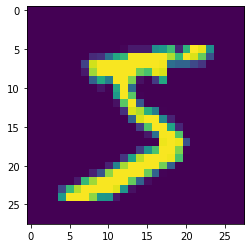

In [43]:
plt.imshow(x_train[0])

In [44]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [45]:
#normalisasi data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# A. Mengupdate Jumlah Neuron

In [46]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=5, strides=(1,1), padding='same', activation=tf.nn.relu, input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='same', activation=tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=256, activation=tf.nn.relu))
model.add(keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(keras.layers.Dense(units=64, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_3 (Flatten)         (None, 3136)             

# B. Tanpa Penggunaan Optimizer


In [48]:
X_train=x_train.reshape(60000,28,28,1)
X_test=x_test.reshape(10000,28,28,1)
model.compile(loss="categorical_crossentropy",metrics=['accuracy']) 
model.fit(x=X_train,y=y_train,epochs=5,batch_size=256,verbose=2)

Epoch 1/5
235/235 - 74s - loss: 0.3993 - accuracy: 0.8780 - 74s/epoch - 314ms/step
Epoch 2/5
235/235 - 71s - loss: 0.0944 - accuracy: 0.9751 - 71s/epoch - 304ms/step
Epoch 3/5
235/235 - 71s - loss: 0.0627 - accuracy: 0.9840 - 71s/epoch - 303ms/step
Epoch 4/5
235/235 - 71s - loss: 0.0493 - accuracy: 0.9875 - 71s/epoch - 303ms/step
Epoch 5/5
235/235 - 71s - loss: 0.0408 - accuracy: 0.9897 - 71s/epoch - 302ms/step


In [49]:
tes_loss,tes_ac=model.evaluate(x_test,y_test,batch_size=128)

79/79 [==============================] - 4s 44ms/step - loss: 0.0279 - accuracy: 0.9916


# C. Dengan Optimizer 


In [50]:
model_1=model
model_1.compile(optimizer="Nadam",loss="categorical_crossentropy",metrics=['accuracy'])
model_1.fit(x=X_train,y=y_train,epochs=5,batch_size=256,verbose=2)

Epoch 1/5
235/235 - 74s - loss: 0.0346 - accuracy: 0.9909 - 74s/epoch - 314ms/step
Epoch 2/5
235/235 - 72s - loss: 0.0271 - accuracy: 0.9929 - 72s/epoch - 308ms/step
Epoch 3/5
235/235 - 72s - loss: 0.0241 - accuracy: 0.9940 - 72s/epoch - 307ms/step
Epoch 4/5
235/235 - 73s - loss: 0.0204 - accuracy: 0.9944 - 73s/epoch - 309ms/step
Epoch 5/5
235/235 - 72s - loss: 0.0169 - accuracy: 0.9954 - 72s/epoch - 308ms/step


In [51]:
tes_loss,tes_ac=model_1.evaluate(x_test,y_test,batch_size=128)

79/79 [==============================] - 4s 45ms/step - loss: 0.0307 - accuracy: 0.9921


# D. Dengan Ukuran Batch Size dan Epoch Berbeda

In [52]:
model.fit(x=X_train,y=y_train,epochs=10,batch_size=64,verbose=2) # jumlah epoch yang lebih banyak dan batch_size yang lebih kecil

Epoch 1/10
938/938 - 82s - loss: 0.0421 - accuracy: 0.9888 - 82s/epoch - 88ms/step
Epoch 2/10
938/938 - 83s - loss: 0.0307 - accuracy: 0.9924 - 83s/epoch - 88ms/step
Epoch 3/10
938/938 - 83s - loss: 0.0253 - accuracy: 0.9930 - 83s/epoch - 88ms/step
Epoch 4/10
938/938 - 83s - loss: 0.0218 - accuracy: 0.9938 - 83s/epoch - 88ms/step
Epoch 5/10
938/938 - 82s - loss: 0.0189 - accuracy: 0.9946 - 82s/epoch - 88ms/step
Epoch 6/10
938/938 - 83s - loss: 0.0184 - accuracy: 0.9949 - 83s/epoch - 88ms/step
Epoch 7/10
938/938 - 82s - loss: 0.0192 - accuracy: 0.9951 - 82s/epoch - 88ms/step
Epoch 8/10
938/938 - 82s - loss: 0.0149 - accuracy: 0.9954 - 82s/epoch - 88ms/step
Epoch 9/10
938/938 - 82s - loss: 0.0156 - accuracy: 0.9956 - 82s/epoch - 88ms/step
Epoch 10/10
938/938 - 82s - loss: 0.0129 - accuracy: 0.9963 - 82s/epoch - 88ms/step


In [53]:
tes_loss,tes_ac=model.evaluate(x_test,y_test,batch_size=64)

157/157 [==============================] - 4s 25ms/step - loss: 0.0346 - accuracy: 0.9931


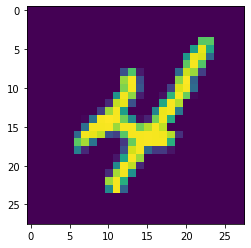

In [54]:
plt.imshow(x_train[9])